In [3]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Load the iris dataset
iris = load_iris()

# Split the data into independent and dependent variables
x_data = iris.data[:,:2]
y_data = iris.target

# Preprocess the data
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Create TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(100).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [9]:
# Define the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(3, activation='softmax', input_shape=(2,))
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_dataset, epochs=100, verbose=0)

# Evaluate the model on test data
loss_val, accuracy = model.evaluate(test_dataset)

1/1 [==============================] - 0s 126ms/step - loss: 0.6379 - accuracy: 0.8333


In [10]:
# Print the loss and accuracy
print("Loss {:.5f}".format(loss_val))
print("Accuracy {:.5f}".format(accuracy))


Loss 0.63793
Accuracy 0.83333


2749/2749 [==============================] - 8s 3ms/step


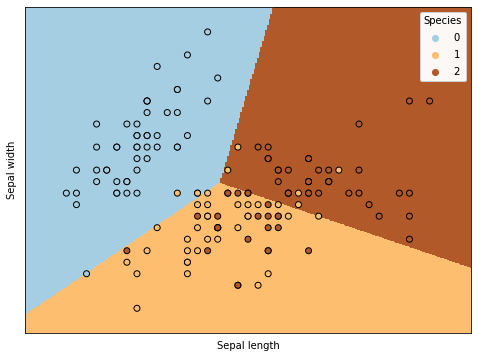

In [16]:
# Plot the decision boundary
x_min, x_max = x_data[:, 0].min() - 0.5, x_data[:, 0].max() + 0.5
y_min, y_max = x_data[:, 1].min() - 0.5, x_data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Add scatter plot with color coding for species
scatter = plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, edgecolors='k', cmap=plt.cm.Paired, label=iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Add legend for species color coding
legend1 = plt.legend(*scatter.legend_elements(), loc="upper right", title="Species")
plt.gca().add_artist(legend1)

plt.show()